In [36]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
import time
import pandas as pd
from urllib.parse import urlencode
from datetime import datetime, timedelta

# "id": "da2b58e8-b8a6-493b-93cf-e2e342eae626",
BASE_URL = 'https://hackathon.kvanttori.fi'

In [4]:
response = requests.get(BASE_URL + '/system')
if response.status_code == 200:
    data = response.json()
    data['dt_timestamp'] = datetime.strptime(data['time'], "%Y-%m-%dT%H:%M:%S%z")

In [5]:
data

{'weather': 'Cloudy',
 'time': '2024-05-09T21:23:42+03:00',
 'dt_timestamp': datetime.datetime(2024, 5, 9, 21, 23, 42, tzinfo=datetime.timezone(datetime.timedelta(seconds=10800)))}

In [89]:
# 3 days in 12h intervals


# Define start and end times
start_time = datetime(2024, 5, 1)
end_time = start_time + timedelta(days=3)

# Generate 12-hour intervals
intervals = pd.date_range(start=start_time, end=end_time, freq='12H')

# Initialize list to store URL encoded intervals
url_encoded_intervals = []

# Iterate over intervals
for i in range(len(intervals) - 1):
    # Define start and end for each interval
    start = intervals[i].isoformat()
    end = intervals[i + 1].isoformat()

    # URL encode the interval
    params = {'start': start, 'end': end}
    url_encoded_interval = urlencode(params)

    # Add to list
    url_encoded_intervals.append(url_encoded_interval)

/var/folders/qz/0cbhxg4s7jsf6cyzrm1_nkq40000gn/T/ipykernel_1600/926201725.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  intervals = pd.date_range(start=start_time, end=end_time, freq='12H')


In [90]:
# get the measurements

ex_meas_url = 'https://hackathon.kvanttori.fi/buildings/da2b58e8-b8a6-493b-93cf-e2e342eae626/measurements?

df = pd.DataFrame()

# print(data)
for interval in url_encoded_intervals:
    # print(ex_meas_url + interval)
    print(interval)
    response = requests.get(ex_meas_url + interval)
    
    if response.status_code == 200:
        data = response.json()
    
    _df = pd.DataFrame(data['consumer']['consumption'])

    df = pd.concat([df, _df], ignore_index=True)


Object `measurements` not found.
start=2024-05-01T00%3A00%3A00&end=2024-05-01T12%3A00%3A00
start=2024-05-01T12%3A00%3A00&end=2024-05-02T00%3A00%3A00
start=2024-05-02T00%3A00%3A00&end=2024-05-02T12%3A00%3A00
start=2024-05-02T12%3A00%3A00&end=2024-05-03T00%3A00%3A00
start=2024-05-03T00%3A00%3A00&end=2024-05-03T12%3A00%3A00
start=2024-05-03T12%3A00%3A00&end=2024-05-04T00%3A00%3A00


In [96]:
# Reading measurement data

ex_meas_url = 'https://hackathon.kvanttori.fi/buildings/da2b58e8-b8a6-493b-93cf-e2e342eae626/measurements'
response = requests.get(ex_meas_url)
if response.status_code == 200:
    data = response.json()

df = pd.DataFrame(data['consumer']['consumption'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  385 non-null    object 
 1   value      385 non-null    float64
 2   unit       385 non-null    object 
dtypes: float64(1), object(2)
memory usage: 9.2+ KB


''

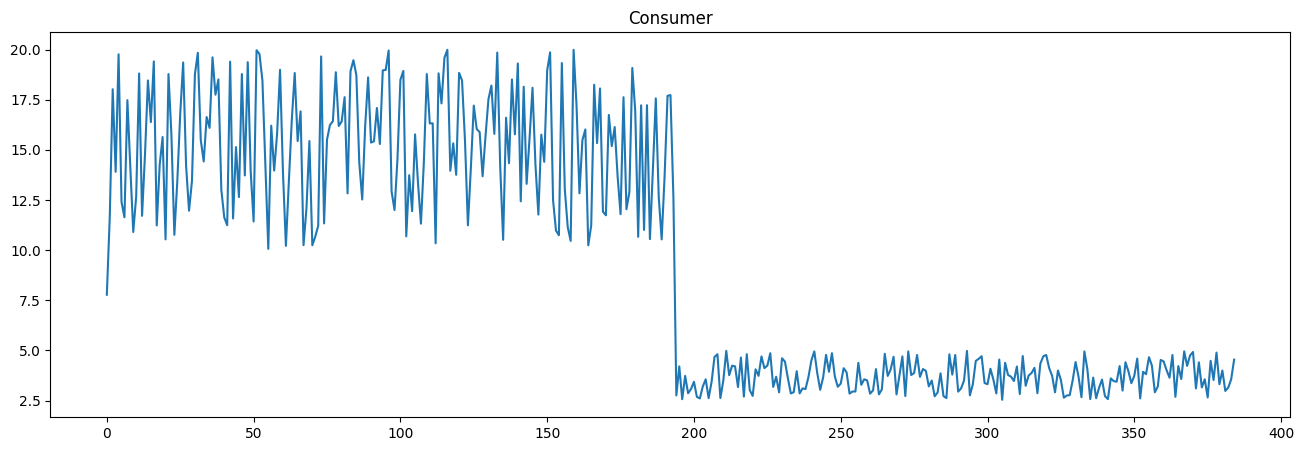

In [100]:
plt.figure(figsize=(16, 5))
plt.plot(df['value'])
# plt.xticks(df['timestamp'][::50], rotation=90)
plt.title('Consumer')
''

timestamp      value unit
0    2024-05-11T16:47:42+03:00   7.773931  kWh
1    2024-05-11T16:48:42+03:00  11.664052  kWh
2    2024-05-11T16:48:42+03:00  18.019925  kWh
3    2024-05-11T16:49:42+03:00  13.905327  kWh
4    2024-05-11T16:49:42+03:00  19.764208  kWh
5    2024-05-11T16:50:42+03:00  12.402155  kWh
6    2024-05-11T16:51:42+03:00  11.634981  kWh
7    2024-05-11T16:51:42+03:00  17.478417  kWh
8    2024-05-11T16:52:42+03:00  14.123281  kWh
9    2024-05-11T16:53:42+03:00  10.901433  kWh
10   2024-05-11T16:54:42+03:00  12.678911  kWh
11   2024-05-11T16:55:42+03:00  18.807180  kWh
12   2024-05-11T16:56:42+03:00  11.708646  kWh
13   2024-05-11T16:57:42+03:00  14.772565  kWh
14   2024-05-11T16:58:42+03:00  18.459243  kWh
15   2024-05-11T16:59:42+03:00  16.386092  kWh
16   2024-05-11T17:00:42+03:00  19.410244  kWh
17   2024-05-11T17:01:42+03:00  11.231257  kWh
18   2024-05-11T17:04:42+03:00  14.246419  kWh
19   2024-05-11T17:05:42+03:00  15.638284  kWh
20   2024-05-11T17:06:42+03:00  10.535598  kWh
21   2024-05-11T17:07:42+03:00  18.777664  kWh
22   2024-05-11T17:08:42+03:00  15.738836  kWh
23   2024-05-11T17:09:42+03:00  10.760779  kWh
24   2024-05-11T17:10:42+03:00  13.422003  kWh
25   2024-05-11T17:11:42+03:00  16.790778  kWh
26   2024-05-11T17:12:42+03:00  19.357096  kWh
27   2024-05-11T17:13:42+03:00  14.199497  kWh
28   2024-05-11T17:14:42+03:00  11.965125  kWh
29   2024-05-11T17:15:42+03:00  13.451007  kWh
30   2024-05-11T17:16:42+03:00  18.763751  kWh
31   2024-05-11T17:17:42+03:00  19.839199  kWh
32   2024-05-11T17:18:42+03:00  15.482215  kWh
33   2024-05-11T17:19:42+03:00  14.420584  kWh
34   2024-05-11T17:20:42+03:00  16.635752  kWh
35   2024-05-11T17:21:42+03:00  16.096595  kWh
36   2024-05-11T17:22:42+03:00  19.612825  kWh
37   2024-05-11T17:23:42+03:00  17.751182  kWh
38   2024-05-11T17:24:42+03:00  18.510680  kWh
39   2024-05-11T17:25:42+03:00  13.011192  kWh
40   2024-05-11T17:26:42+03:00  11.630725  kWh
41   2024-05-11T17:27:42+03:00  11.241005  kWh
42   2024-05-11T17:28:42+03:00  19.397565  kWh
43   2024-05-11T17:29:42+03:00  11.576860  kWh
44   2024-05-11T17:30:42+03:00  15.137010  kWh
45   2024-05-11T17:31:42+03:00  12.644521  kWh
46   2024-05-11T17:32:42+03:00  18.778529  kWh
47   2024-05-11T17:33:42+03:00  13.721456  kWh
48   2024-05-11T17:34:42+03:00  19.373229  kWh
49   2024-05-11T17:35:42+03:00  13.927246  kWh
50   2024-05-11T17:36:42+03:00  11.425203  kWh
51   2024-05-11T17:37:42+03:00  19.967588  kWh
52   2024-05-11T17:38:42+03:00  19.775411  kWh
53   2024-05-11T17:39:42+03:00  18.458287  kWh
54   2024-05-11T17:40:42+03:00  14.291665  kWh
55   2024-05-11T17:41:42+03:00  10.061929  kWh
56   2024-05-11T17:42:42+03:00  16.204931  kWh
57   2024-05-11T17:43:42+03:00  13.965901  kWh
58   2024-05-11T17:44:42+03:00  15.798869  kWh
59   2024-05-11T17:45:42+03:00  18.991434  kWh
60   2024-05-11T17:46:42+03:00  13.872184  kWh
61   2024-05-11T17:47:42+03:00  10.210563  kWh
62   2024-05-11T17:48:42+03:00  13.405230  kWh
63   2024-05-11T17:49:42+03:00  16.477384  kWh
64   2024-05-11T17:50:42+03:00  18.831708  kWh
65   2024-05-11T17:51:42+03:00  15.437268  kWh
66   2024-05-11T17:52:42+03:00  16.917993  kWh
67   2024-05-11T17:53:42+03:00  10.245227  kWh
68   2024-05-11T17:54:42+03:00  12.080349  kWh
69   2024-05-11T17:55:42+03:00  15.437858  kWh
70   2024-05-11T17:56:42+03:00  10.239088  kWh
71   2024-05-11T17:57:42+03:00  10.676799  kWh
72   2024-05-11T17:58:42+03:00  11.210725  kWh
73   2024-05-11T17:59:42+03:00  19.657830  kWh
74   2024-05-11T18:00:42+03:00  11.331308  kWh
75   2024-05-11T18:01:42+03:00  15.508017  kWh
76   2024-05-11T18:02:42+03:00  16.238168  kWh
77   2024-05-11T18:03:42+03:00  16.429380  kWh
78   2024-05-11T18:04:42+03:00  18.868705  kWh
79   2024-05-11T18:05:42+03:00  16.188123  kWh
80   2024-05-11T18:06:42+03:00  16.414379  kWh
81   2024-05-11T18:07:42+03:00  17.626733  kWh
82   2024-05-11T18:08:42+03:00  12.828853  kWh
83   2024-05-11T18:09:42+03:00  18.917620  kWh
84   2024-05-11T18:10:42+0

In [184]:
all_data['producer'].keys()

dict_keys(['to_storage', 'to_consumption', 'to_grid'])

In [22]:
"""
Grid:
{
  "to_storage": 0
}

Production:
{
  "to_consumption": 0,
  "to_grid": 0,
  "to_storage": 0
}

Storage:
{
  "to_consumption": 0,
  "to_grid": 0
}
"""
def set_allocations(setup, id='da2b58e8-b8a6-493b-93cf-e2e342eae626'):
    base_url = 'https://hackathon.kvanttori.fi/buildings/' + id + '/allocations'

    if 'grid' in setup.keys():
        url = base_url + '/grid_allocation'
        response = requests.post(url, json=setup['grid'])
        print(f'grid -> {response}')

    if 'production' in setup.keys():
        url = base_url + '/production_allocation'
        response = requests.post(url, json=setup['production'])
        print(f'production -> {response}')

    if 'storage' in setup.keys():
        url = base_url + '/storage_allocation'
        response = requests.post(url, json=setup['storage'])
        print(f'storage -> {response}')

def get_all_consumer_data(id='da2b58e8-b8a6-493b-93cf-e2e342eae626'):
    
    # Reading consumer
    ex_meas_url = 'https://hackathon.kvanttori.fi/buildings/' + id + '/measurements'
    response = requests.get(ex_meas_url)
    if response.status_code == 200:
        data = response.json()

    # Consumer df
    cons_df = pd.DataFrame(data['consumer']['consumption'])
    cons_df = cons_df.rename(columns={"value" : "consumption"})
    
    # Production df
    prod_df = pd.DataFrame(data['producer']['to_grid'])
    prod_df = prod_df.rename(columns={"value": "to_grid"})
    
    _df = pd.DataFrame(data['producer']['to_consumption'])
    _df = _df.rename(columns={"value": "to_consumption"})
    prod_df = pd.concat([prod_df, _df['to_consumption']], axis=1)
    
    _df = pd.DataFrame(data['producer']['to_storage'])
    _df = _df.rename(columns={"value": "to_storage"})
    prod_df = pd.concat([prod_df, _df['to_storage']], axis=1)

    # Grid df    
    grid_df = pd.DataFrame(data['grid']['to_consumption'])
    grid_df = prod_df.rename(columns={"value": "to_consumption"})
    
    _df = pd.DataFrame(data['grid']['to_storage'])
    _df = _df.rename(columns={"value": "to_storage"})
    grid_df = pd.concat([grid_df, _df['to_storage']], axis=1)

    return data, cons_df, prod_df, grid_df

def plot_all_data(cons_df, prod_df, grid_df):

    xticks_num = 40
    
    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot data on each subplot
    axs[0].plot(cons_df['timestamp'], cons_df['consumption'], label='Consumer consumption')
    axs[0].set_title('Consumer Consumption')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Value')
    axs[0].set_xticks(cons_df['timestamp'][::cons_df.shape[0] // xticks_num])
    
    axs[1].plot(prod_df['timestamp'], prod_df['to_grid'], label='Producer to grid')
    axs[1].plot(prod_df['timestamp'], prod_df['to_consumption'], label='Producer to consumption')
    axs[1].plot(prod_df['timestamp'], prod_df['to_storage'], label='Producer to storage')
    axs[1].set_title('Producer Production')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Value')
    axs[1].set_xticks(prod_df['timestamp'][::prod_df.shape[0] // xticks_num])
    axs[1].legend()
    
    axs[2].plot(grid_df['timestamp'], grid_df['to_consumption'], label='Grid to consumption')
    axs[2].plot(grid_df['timestamp'], grid_df['to_storage'], label='Grid to storage')
    axs[2].set_title('Grid')
    axs[2].set_xlabel('Timestamp')
    axs[2].set_ylabel('Value')
    axs[2].set_xticks(grid_df['timestamp'][::grid_df.shape[0] // xticks_num])
    axs[2].legend()

    plt.show()
    # plt.xticks(a_df['timestamp'][::10], rotation=90)

# def plot_all_data_ma(cons_df, prod_df, grid_df, window=10):
    
#     # Calculate moving averages
#     cons_df_consumption_ma = cons_df['consumption'].rolling(window=window).mean()
#     prod_df_to_grid_ma = prod_df['to_grid'].rolling(window=window).mean()
#     prod_df_to_consumption_ma = prod_df['to_consumption'].rolling(window=window).mean()
#     prod_df_to_storage_ma = prod_df['to_storage'].rolling(window=window).mean()
#     grid_df_to_consumption_ma = grid_df['to_consumption'].rolling(window=window).mean()
#     grid_df_to_storage_ma = grid_df['to_storage'].rolling(window=window).mean()

#     # Plotting
#     fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
#     # Plot data and moving averages on each subplot
#     # axs[0].plot(cons_df['timestamp'], cons_df['consumption'], label='Consumer consumption')
#     axs[0].plot(cons_df['timestamp'], cons_df_consumption_ma, label='Moving Average', color='red')
#     axs[0].set_title('Consumer Consumption')
#     axs[0].set_xlabel('Timestamp')
#     axs[0].set_ylabel('Value')
#     axs[0].legend()
    
#     # axs[1].plot(prod_df['timestamp'], prod_df['to_grid'], label='Producer to grid')
#     axs[1].plot(prod_df['timestamp'], prod_df_to_grid_ma, label='Moving Average', color='red')
#     # axs[1].plot(prod_df['timestamp'], prod_df['to_consumption'], label='Producer to consumption')
#     axs[1].plot(prod_df['timestamp'], prod_df_to_consumption_ma, label='Moving Average', color='red')
#     # axs[1].plot(prod_df['timestamp'], prod_df['to_storage'], label='Producer to storage')
#     axs[1].plot(prod_df['timestamp'], prod_df_to_storage_ma, label='Moving Average', color='red')
#     axs[1].set_title('Producer Production')
#     axs[1].set_xlabel('Timestamp')
#     axs[1].set_ylabel('Value')
#     axs[1].legend()
    
#     # axs[2].plot(grid_df['timestamp'], grid_df['to_consumption'], label='Grid to consumption')
#     axs[2].plot(grid_df['timestamp'], grid_df_to_consumption_ma, label='Moving Average', color='red')
#     # axs[2].plot(grid_df['timestamp'], grid_df['to_storage'], label='Grid to storage')
#     axs[2].plot(grid_df['timestamp'], grid_df_to_storage_ma, label='Moving Average', color='red')
#     axs[2].set_title('Grid')
#     axs[2].set_xlabel('Timestamp')
#     axs[2].set_ylabel('Value')
#     axs[2].legend()

#     plt.show()

def plot_all_data_ma(cons_df, prod_df, grid_df, window=10):
    
    xticks_num = 20

    # Calculate moving averages
    cons_df_consumption_ma = cons_df['consumption'].rolling(window=window).mean()
    prod_df_to_grid_ma = prod_df['to_grid'].rolling(window=window).mean()
    prod_df_to_consumption_ma = prod_df['to_consumption'].rolling(window=window).mean()
    prod_df_to_storage_ma = prod_df['to_storage'].rolling(window=window).mean()
    grid_df_to_consumption_ma = grid_df['to_consumption'].rolling(window=window).mean()
    grid_df_to_storage_ma = grid_df['to_storage'].rolling(window=window).mean()

    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot data and moving averages on each subplot
    # axs[0].plot(cons_df['timestamp'], cons_df['consumption'], label='Consumer consumption')
    axs[0].plot(cons_df['timestamp'], cons_df_consumption_ma, label='Consumer consumption (MA)', color='red')
    axs[0].set_title('Consumer Consumption')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Value')
    axs[0].set_xticks(cons_df['timestamp'][::cons_df.shape[0] // xticks_num])
    axs[0].tick_params(axis='x',which='minor',direction='out',bottom=True, labelrotation=90)
    axs[0].legend()
    
    # axs[1].plot(prod_df['timestamp'], prod_df['to_grid'], label='Producer to grid')
    axs[1].plot(prod_df['timestamp'], prod_df_to_grid_ma, label='Producer to grid (MA)', color='red')
    # axs[1].plot(prod_df['timestamp'], prod_df['to_consumption'], label='Producer to consumption')
    axs[1].plot(prod_df['timestamp'], prod_df_to_consumption_ma, label='Producer to consumption (MA)', color='green')
    # axs[1].plot(prod_df['timestamp'], prod_df['to_storage'], label='Producer to storage')
    axs[1].plot(prod_df['timestamp'], prod_df_to_storage_ma, label='Producer to storage (MA)', color='blue')
    axs[1].set_title('Producer Production')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Value')
    axs[1].set_xticks(prod_df['timestamp'][::prod_df.shape[0] // xticks_num])
    axs[1].tick_params(axis='x',which='minor',direction='out',bottom=True, rotation=90)
    axs[1].legend()
    
    # axs[2].plot(grid_df['timestamp'], grid_df['to_consumption'], label='Grid to consumption')
    axs[2].plot(grid_df['timestamp'], grid_df_to_consumption_ma, label='Grid to consumption (MA)', color='red')
    # axs[2].plot(grid_df['timestamp'], grid_df['to_storage'], label='Grid to storage')
    axs[2].plot(grid_df['timestamp'], grid_df_to_storage_ma, label='Grid to storage (MA)', color='blue')
    axs[2].set_title('Grid')
    axs[2].set_xlabel('Timestamp')
    axs[2].set_ylabel('Value')
    axs[2].set_xticks(grid_df['timestamp'][::grid_df.shape[0] // xticks_num])
    axs[2].tick_params(axis='x',which='minor',direction='out',bottom=True, rotation=90)
    axs[2].legend()

    plt.show()

In [3]:
def get_latest_timestamp(df):
    return df['timestamp'][-1]

def get_system_state():
    response = requests.get('https://hackathon.kvanttori.fi/system')
    if response.status_code == 200:
        data = response.json()
        data['dt_timestamp'] = datetime.strptime(data['time'], "%Y-%m-%dT%H:%M:%S%z")

        return data
    else:
        # TODO: raise exception
        print("Error: Failed to retrieve data")
        return None

In [29]:
storage_charge = pd.DataFrame(all_data[0]['storage']['charge'])

In [34]:
storage_charge.describe()

value
count  13588.000000
mean       3.121878
std        3.242550
min        0.000000
25%        0.133376
50%        0.992734
75%        5.774713
max        9.999973

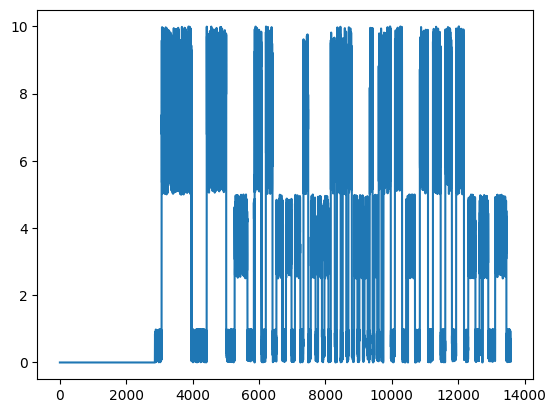

In [32]:
plt.plot(storage_charge['value'])

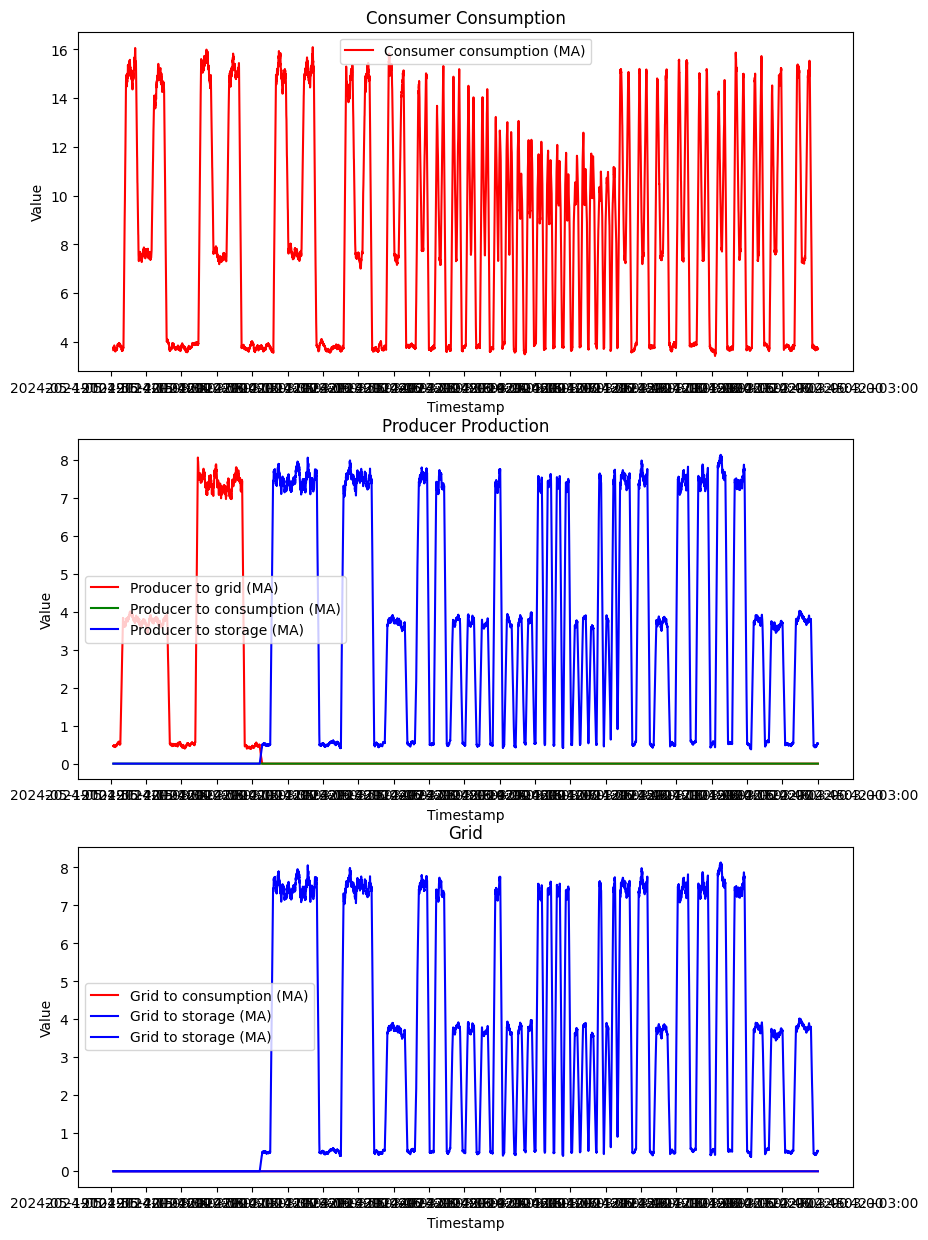

In [23]:
plot_all_data_ma(all_data[1], all_data[2], all_data[3], window=50)

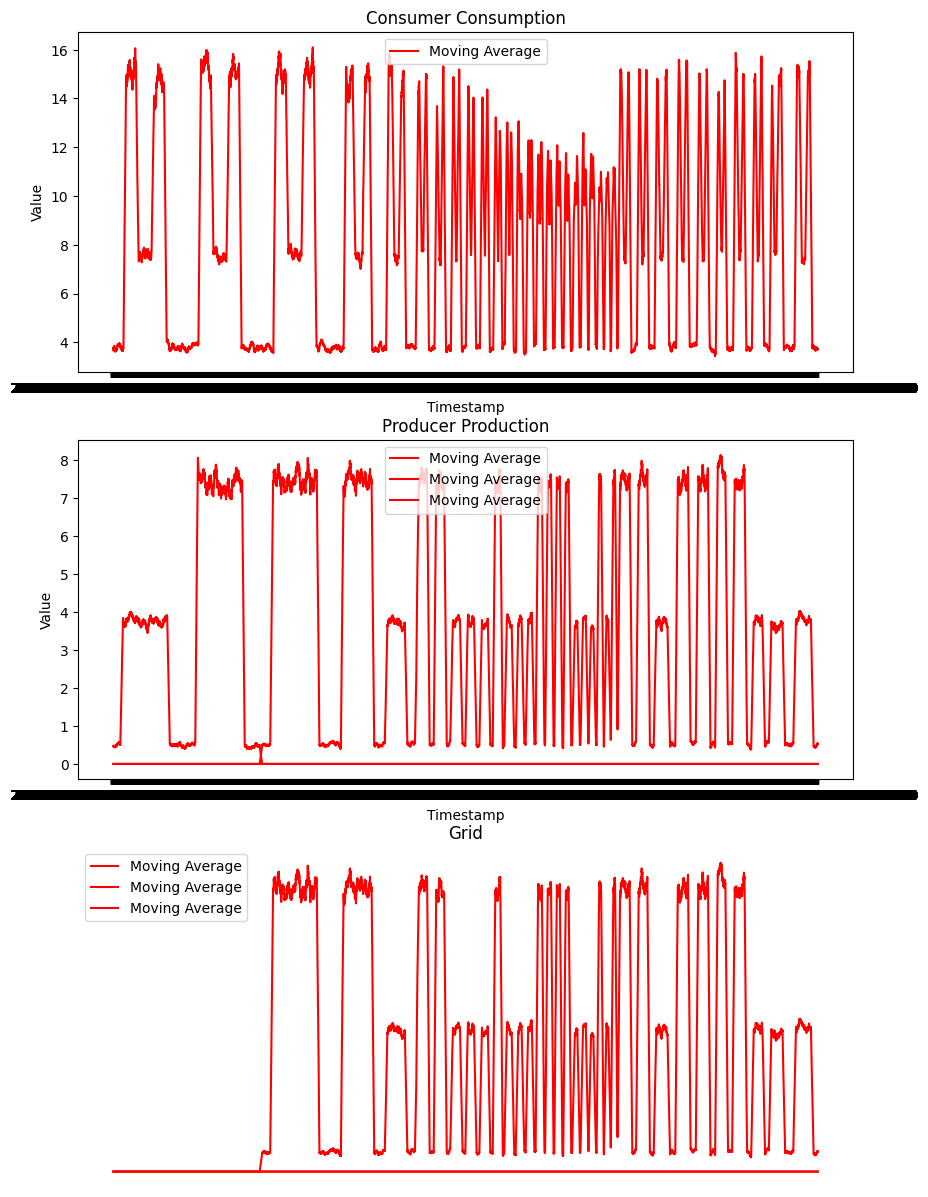

In [9]:
plot_all_data_ma(all_data[1], all_data[2], all_data[3], window=50)

In [ ]:
plot_all_data(all_data[1], all_data[2], all_data[3])

In [4]:
all_data = get_all_consumer_data()
# plot_all_data(all_data[1], all_data[2], all_data[3])

In [213]:
my_setup = {
    'production' : {
        'to_consumption' : 0,
        'to_grid' : 0,
        'to_storage' : 1.0
    },
    'grid' : {
      'to_storage': 0
    },
    'storage': {
      'to_consumption': 1.0,
      'to_grid': 0
    }
}

set_allocations(my_setup)

grid -> <Response [200]>
production -> <Response [200]>
storage -> <Response [200]>


In [229]:
def control(interval_data):
    # create allocation
    # allocation = ...
    # set_allocations(allocations)
    pass

def main():
    # Get all data
    all_data = get_all_consumer_data()
    
    # Find the last timestamp
    latest_ts = get_latest_timestamp(all_data[3])

    while True:
        time.sleep(10) # sleep or wake up idk
        
        curr_state = get_system_state()
        
        # compute timestamp difference
        current_ts = curr_state['timestamp']

        print(latest_ts, current_ts)
        
        latest_ts = current_ts

        # TODO:
        #int_data = get_data_interval()
        # control(int_data)
        # all_data = append_data(all_data, int_data)
        
        # in every update, get the new data:
        # - act
        # - append to past data

main()

KeyError: -1

In [ ]:
class MyApp(App):

    def build(self):
        box = BoxLayout()
        box.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        return box

print(get_system_state())

# MyApp().run()

## Trying out stream

In [38]:
lines = requests.get(BASE_URL + '/buildings/da2b58e8-b8a6-493b-93cf-e2e342eae626/streams', stream=True).iter_lines()
for line in lines:
    #parse line as JSON and do whatever
    print(line)

b'{"producer":{"to_storage":{"timestamp":"2024-06-26T11:21:42+03:00","value":3.337613583441659,"unit":"kWh"},"to_consumption":{"timestamp":"2024-06-26T11:21:42+03:00","value":0.0,"unit":"kWh"},"to_grid":{"timestamp":"2024-06-26T11:21:42+03:00","value":0.0,"unit":"kWh"}},"consumer":{"consumption":{"timestamp":"2024-06-26T11:21:42+03:00","value":9.934823342161534,"unit":"kWh"}},"storage":{"to_consumption":{"timestamp":"2024-06-26T11:21:42+03:00","value":4.479033326182334,"unit":"kWh"},"to_grid":{"timestamp":"2024-06-26T11:21:42+03:00","value":0.0,"unit":"kWh"},"charge":{"timestamp":"2024-06-26T11:21:42+03:00","value":3.3376135834416587,"unit":"kWh"}},"grid":{"to_storage":{"timestamp":"2024-06-26T11:21:42+03:00","value":0.0,"unit":"kWh"},"to_consumption":{"timestamp":"2024-06-26T11:21:42+03:00","value":5.4557900159792005,"unit":"kWh"}}}'
b'{"producer":{"to_storage":{"timestamp":"2024-06-26T11:28:42+03:00","value":4.063227692992156,"unit":"kWh"},"to_consumption":{"timestamp":"2024-06-26T11

KeyboardInterrupt: 

In [37]:
import requests, json

lines = requests.get(BASE_URL + '/system/stream', stream=True).iter_lines()
for line in lines:
    #parse line as JSON and do whatever
    print(line)


b'{"weather":"Cloudy","time":"2024-06-26T09:52:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:53:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:54:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:55:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:56:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:57:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:58:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T09:59:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:00:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:01:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:02:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:03:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:04:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:05:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:06:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:07:42+03:00"}'
b'{"weather":"Cloudy","time":"2024-06-26T10:08:42+03:00"

KeyboardInterrupt: 